## Imports

In [83]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from flask import Flask, request, jsonify
import joblib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


## Data Preprocessing

In [84]:
train_df = pd.read_csv(r"C:\Users\DELL\maids\python\data\train.csv")
test_df = pd.read_csv(r"C:\Users\DELL\maids\python\data\test.csv")
print(train_df.head())


   battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0            842     0          2.2         0   1.0     0.0         7.0   
1           1021     1          0.5         1   0.0     1.0        53.0   
2            563     1          0.5         1   2.0     1.0        41.0   
3            615     1          2.5         0   0.0     0.0        10.0   
4           1821     1          1.2         0  13.0     1.0        44.0   

   m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
0    0.6      188.0      2.0  ...       20.0     756.0  2549.0   9.0   7.0   
1    0.7      136.0      3.0  ...      905.0    1988.0  2631.0  17.0   3.0   
2    0.9      145.0      5.0  ...     1263.0    1716.0  2603.0  11.0   2.0   
3    0.8      131.0      6.0  ...     1216.0    1786.0  2769.0  16.0   8.0   
4    0.6      141.0      2.0  ...     1208.0    1212.0  1411.0   8.0   2.0   

   talk_time  three_g  touch_screen  wifi  price_range  
0         19        0  

In [85]:
train_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,...,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,...,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,...,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [86]:

columns = [
    'id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
    'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width',
    'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range'
]

categorical_cols = [
    'blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi'
]

numerical_cols = [
    col for col in columns if col not in ['id', 'price_range'] and col not in categorical_cols
]

print("Categorical columns:")
print(categorical_cols)

print("\nNumerical columns:")
print(numerical_cols)


Categorical columns:
['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

Numerical columns:
['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']


Handling missing values

In [87]:
print(train_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

There are some missing values in the dataset. We'll fill numerical data with the mean of the column and categorical data with the most frequent value in the column & We'll use Label encoding to convert categorical data to a suitable format. Note that we used label encoding to fill in the missing categorical data, it wouldnt have been necessary if the data were not binary.

In [88]:
numerical_imputer = SimpleImputer(strategy='mean')
train_df[numerical_cols] = numerical_imputer.fit_transform(train_df[numerical_cols])
test_df[numerical_cols] = numerical_imputer.transform(test_df[numerical_cols])
test_df['price_range'] = 0 

if not categorical_cols:
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    train_df[categorical_cols] = categorical_imputer.fit_transform(train_df[categorical_cols])
    test_df[categorical_cols] = categorical_imputer.transform(test_df[categorical_cols])

label_encoder = LabelEncoder()
for col in categorical_cols:
    train_df[col] = label_encoder.fit_transform(train_df[col])
    test_df[col] = label_encoder.transform(test_df[col])

print(train_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   float64
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   float64
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   float64
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   float64
 9   n_cores        2000 non-null   float64
 10  pc             2000 non-null   float64
 11  px_height      2000 non-null   float64
 12  px_width       2000 non-null   float64
 13  ram            2000 non-null   float64
 14  sc_h           2000 non-null   float64
 15  sc_w           2000 non-null   float64
 16  talk_time      2000 non-null   float64
 17  three_g        2000 non-null   int64  
 18  touch_sc

Correlation Heat Map

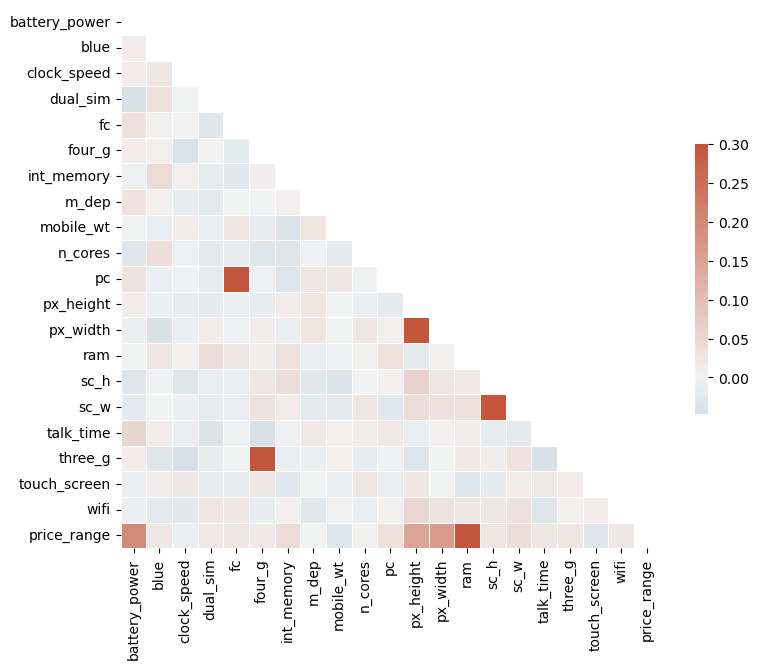

In [97]:
corr = train_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(9, 7))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

We can tell that here are no high correlations between the features, but we can say note a few things:

1. Price gets high when the ram increases
2. Every 4G device has 3G 
3. front camera high pixels and primary camera pixels ar correlated

## Training Possible Models

In [90]:
X = train_df.drop(columns=['price_range'])
y = train_df['price_range']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest

In [91]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_val_preds = rf_classifier.predict(X_val)
rf_val_accuracy = accuracy_score(y_val, rf_val_preds)
print("Random Forest Validation Accuracy:", rf_val_accuracy)



Random Forest Validation Accuracy: 0.8925


Gradient Boosting

In [92]:
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)
gb_val_preds = gb_classifier.predict(X_val)
gb_val_accuracy = accuracy_score(y_val, gb_val_preds)
print("Gradient Boosting Validation Accuracy:", gb_val_accuracy)

Gradient Boosting Validation Accuracy: 0.9025


SVM

In [93]:
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)
svm_val_preds = svm_classifier.predict(X_val)
svm_val_accuracy = accuracy_score(y_val, svm_val_preds)
print("SVM Validation Accuracy:", svm_val_accuracy)


SVM Validation Accuracy: 0.965


## Evaluation Metrics for the three models

In [102]:

models = {'Random Forest': rf_classifier, 'Gradient Boosting': gb_classifier, 'SVM': svm_classifier}
metrics = {}

for model_name, model in models.items():
    y_pred = model.predict(X_val)
    metrics[model_name] = {
        'Accuracy': accuracy_score(y_val, y_pred),
        'Precision': precision_score(y_val, y_pred, average='weighted'),
        'Recall': recall_score(y_val, y_pred, average='weighted'),
        'F1 Score': f1_score(y_val, y_pred, average='weighted'),
    }

metrics_df = pd.DataFrame(metrics).T
print(metrics_df)

                   Accuracy  Precision  Recall  F1 Score
Random Forest        0.8925   0.895748  0.8925  0.893214
Gradient Boosting    0.9025   0.904411  0.9025  0.903116
SVM                  0.9650   0.965478  0.9650  0.965036


We wont need to perform any hyperparameter tuning since the three models already perform remarkeably well. However we'll choose SVM as it has proven to be better in many use cases

## Saving the Model

In [94]:
from joblib import dump

dump(svm_classifier, 'svm_classifier.pkl')

['svm_classifier.pkl']

## Prediction API

In [95]:
app = Flask(__name__)

model = joblib.load('svm_classifier.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    specs = request.json
    specs.pop('id', None)
    specs.pop('price_range', None)
    specs.pop('mdep', None)
    specs.pop('ncores', None)
    specs_array = np.array([list(specs.values())])
    predicted_price = model.predict(specs_array)
    predicted_price_list = predicted_price.tolist()
    return jsonify({'predictedPrice': predicted_price_list})

if __name__ == '__main__':
    app.run(port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
